In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from calendar import monthrange


В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', parse_dates=['month'], dayfirst=True)
milk.head()

,month,milk
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


Какой из приведённых ниже графиков у вас получился?

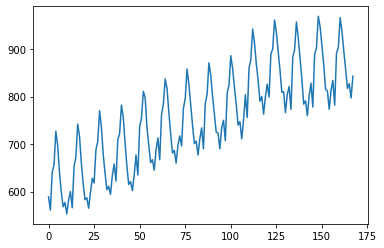

In [4]:
milk.milk.plot()
plt.show()

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера.
Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [5]:
print('p-value',sm.tsa.stattools.adfuller(milk.milk)[1])
sm.tsa.stattools.adfuller(milk.milk)

p-value 0.6274267086030308


(-1.3038115874221312,
 0.6274267086030308,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [6]:
milk['days_in_month'] = milk.month.apply(lambda x: x.days_in_month)

In [7]:
milk['milk_per_day'] = milk['milk']/milk['days_in_month']

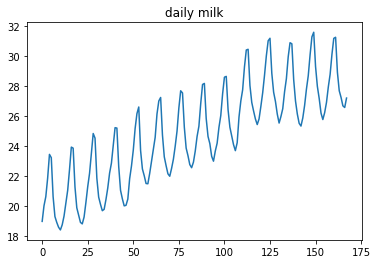

In [8]:
plt.plot()
plt.title('daily milk')
milk.milk_per_day.plot()
plt.show()

In [9]:
milk['milk_per_day'].sum()

4166.326661899466

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

In [10]:
milk['daily_diff1'] = milk.milk_per_day - milk.milk_per_day.shift(1)
milk['daily_diff12'] = milk.milk_per_day - milk.milk_per_day.shift(12)

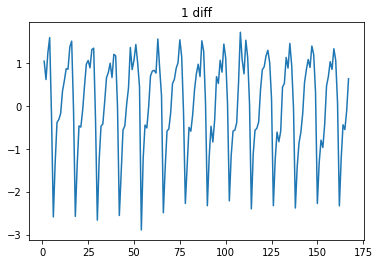

In [11]:
plt.plot()
plt.title('1 diff')
milk.daily_diff1.plot()
plt.show()

In [12]:
sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())

(-2.759469476228914,
 0.06430054654174644,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.153997338105512)

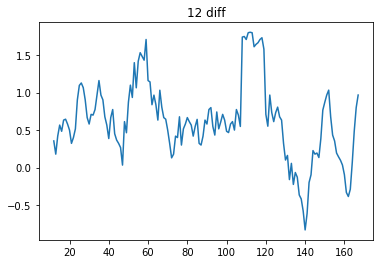

In [13]:
plt.plot()
plt.title('12 diff')
milk.daily_diff12.plot()
plt.show()

In [14]:
sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())

(-2.1594860932888085,
 0.22127672658830344,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [15]:
milk['daily_diff_1_12'] = milk['daily_diff12'] - milk.daily_diff12.shift(1)

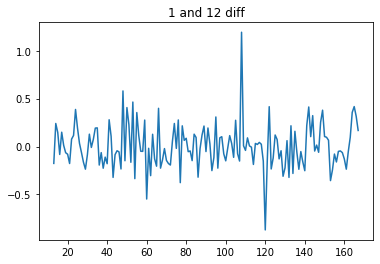

In [16]:
plt.plot()
plt.title('1 and 12 diff')
milk['daily_diff_1_12'].plot()
plt.show()

In [17]:
sm.tsa.stattools.adfuller(milk.daily_diff_1_12.dropna())

(-5.481326334796926,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

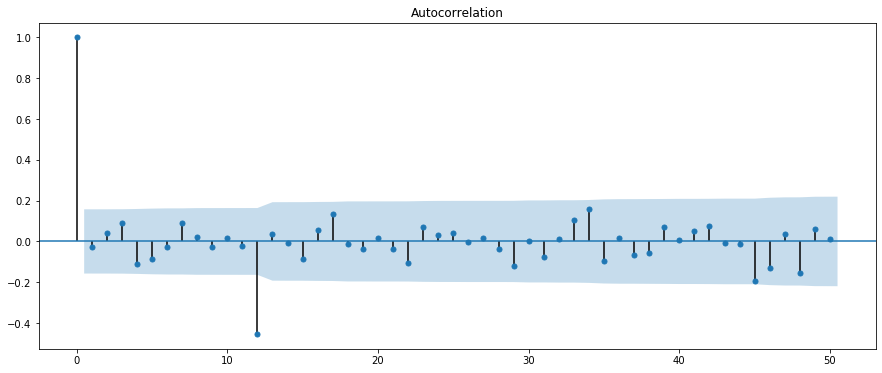

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))
sm.graphics.tsa.plot_acf(milk.daily_diff_1_12.dropna(), lags=50, ax=ax)
plt.show()

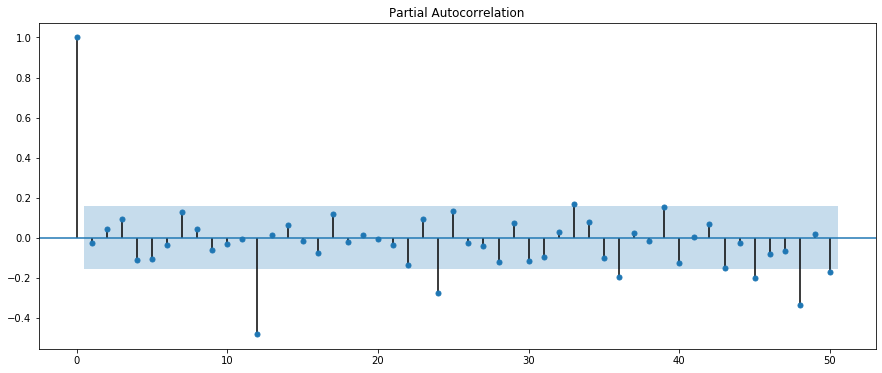

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
sm.graphics.tsa.plot_pacf(milk.daily_diff_1_12.dropna(), lags=50, ax=ax)
plt.show()